**Analyzing Hotel Bookings data**

In [50]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import math
import warnings
import plotly.express as pl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore")

# 1. Uploading the dataset

In [2]:
#Reading the input csv file
hotelbooking_df=pd.read_csv("hotel_bookings.csv")
hotelbooking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
#Checking the datatypes of the variables
hotelbooking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Some statistics about numeric columns
hotelbooking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# 2. Data Preprocessing and Cleaning

In [5]:
#Checking for null values in all the columns
hotelbooking_df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [8]:
#Treating null values with imputation

hotelbooking_df['agent'].fillna(round(hotelbooking_df.agent.mean()),inplace=True)
hotelbooking_df['company'].fillna(round(hotelbooking_df.company.mean()),inplace=True)
hotelbooking_df['country'].fillna(round(hotelbooking_df.company.mode()),inplace=True)
hotelbooking_df['children'].dropna(inplace=True)

<AxesSubplot:xlabel='adr'>

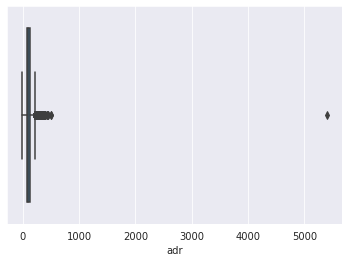

In [7]:
#Outliers identification using boxplot
sns.set_style("darkgrid")

sns.boxplot(hotelbooking_df['adr'])


Removing outlier

In [9]:
print("Highest allowed",hotelbooking_df['adr'].mean() + 17.79*hotelbooking_df['adr'].std())
a=hotelbooking_df[(hotelbooking_df['adr'] > 1000.86)] 
print(a[["hotel","adr"]])


Highest allowed 1000.8628307143784
            hotel     adr
48515  City Hotel  5400.0


In [10]:
hotelbooking_df_clean = hotelbooking_df[(hotelbooking_df['adr'] < 1000.86)]
hotelbooking_df_clean
hotelbooking_df_clean['adr'].describe()

count    119389.000000
mean        101.786744
std          48.153554
min          -6.380000
25%          69.290000
50%          94.560000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [11]:
#Creating a new df
hotelbooking_df_new=hotelbooking_df_clean.copy()

# 3. Exploratory Data Analysis and Visualization

In [12]:
#Country Wise Guest Count
data_country = pd.DataFrame(hotelbooking_df_clean.loc[hotelbooking_df_clean['is_canceled']==0]["country"].value_counts())
data_country
total_guests = data_country['country'].sum()
total_guests
data_country["% of Guests"] = round(data_country["country"]/total_guests*100,2)
data_country.rename(columns={"country":"Guests count"},inplace = True)
data_country["country"] = data_country.index

In [13]:
fig = pl.pie(data_country,
             values = "Guests count",
             names = "country",
             title = "Country wise Guest Count",
             template = "seaborn"
             )
fig.update_traces(textposition = "inside",textinfo="value+percent+label")
fig.show()

In [18]:
#Defining functions get_count and plot to retrieve data and create plots respectively

def get_count(cnt, limit=None):
  if limit != None:        
    cnt = cnt.value_counts()[:limit]  
  else:        
    cnt = cnt.value_counts()        
  x = cnt.index    
  y = cnt/cnt.sum()*100        
  return x.values,y.values

def plot(x, y, x_label=None,y_label=None, title=None, figsize=(8,4), type=None):
  sns.set_style('darkgrid')        
  
  fig, ax = plt.subplots(figsize=figsize)    
  if x_label != None:        
    ax.set_xlabel(x_label)    
  if y_label != None:        
    ax.set_ylabel(y_label)    
  if title != None:        
    ax.set_title(title)    
  if type == 'bar':        
    sns.barplot(x=x,y=y, ax = ax)
  elif type == 'line':        
    sns.lineplot(x=x,y=y, ax = ax)
  plt.show()

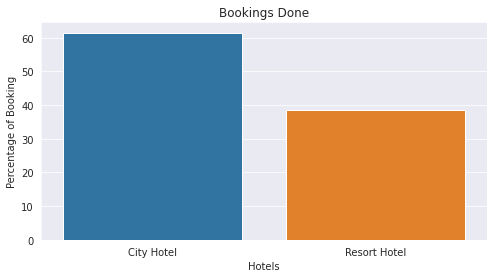

In [16]:
#Bookings made in City and Resort hotels

df_bookings_done=hotelbooking_df_new[hotelbooking_df_new['is_canceled']==0]
df_bookings_done
x,y= get_count(df_bookings_done['hotel'])
plot(x,y,x_label='Hotels',y_label='Percentage of Booking',title='Bookings Done',type='bar')

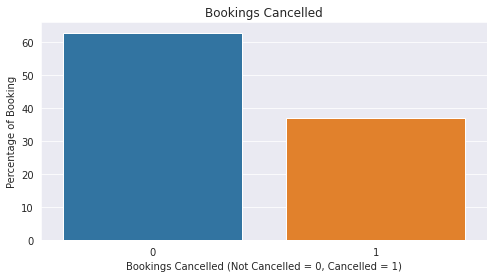

In [17]:
#Bar chart for cancelled bookings
x,y=get_count(hotelbooking_df_new['is_canceled'])
plot(x,y,x_label='Bookings Cancelled (Not Cancelled = 0, Cancelled = 1)',y_label='Percentage of Booking',title='Bookings Cancelled',type='bar')


Cancellations in city and resort hotels

Resort Hotel Cancelations=  0.27763354967548676
City Hotel Cancelations=  0.41726963317786464


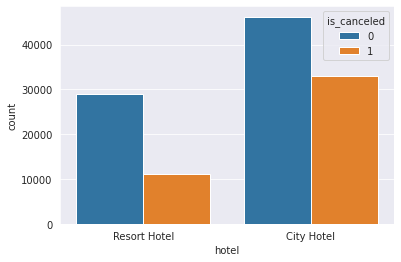

In [19]:
#Bookings cancelled in Resort hotels and City hotels
sns.countplot(data=hotelbooking_df, x='hotel', hue='is_canceled')
resort_hotel_canceled = hotelbooking_df[(hotelbooking_df['hotel']=='Resort Hotel') & (hotelbooking_df['is_canceled']==1)]
city_hotel_canceled = hotelbooking_df[(hotelbooking_df['hotel']=='City Hotel') & (hotelbooking_df['is_canceled']==1)]
print('Resort Hotel Cancelations= ', (len(resort_hotel_canceled))/(len(hotelbooking_df[hotelbooking_df['hotel']=='Resort Hotel'])))
print('City Hotel Cancelations= ', (len(city_hotel_canceled))/(len(hotelbooking_df[hotelbooking_df['hotel']=='City Hotel'])))

Cancelations among new customers=  0.3778508392455442
Cancelations among old customers=  0.14488188976377953


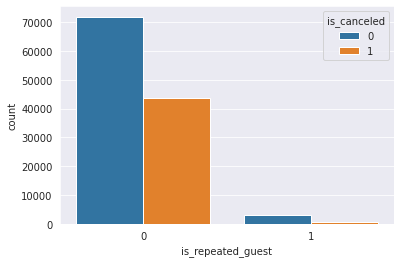

In [21]:
#Cancellation among new and old customers
sns.countplot(data=hotelbooking_df, x='is_repeated_guest', hue='is_canceled')
new_customer = hotelbooking_df[(hotelbooking_df['is_repeated_guest']==0) & (hotelbooking_df['is_canceled']==1)]
old_customer = hotelbooking_df[(hotelbooking_df['is_repeated_guest']==1) & (hotelbooking_df['is_canceled']==1)]
print('Cancelations among new customers= ', (len(new_customer))/(len(hotelbooking_df[hotelbooking_df['is_repeated_guest']==0])))
print('Cancelations among old customers= ', (len(old_customer))/(len(hotelbooking_df[hotelbooking_df['is_repeated_guest']==1])))

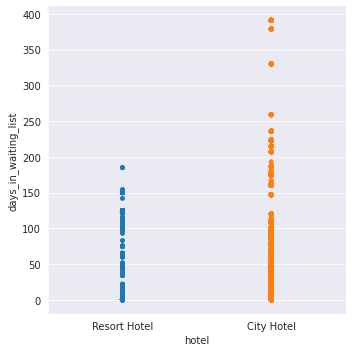

In [22]:
#Waitng list in city and resort hotel
sns.catplot(data=hotelbooking_df, x='hotel', y='days_in_waiting_list', jitter=False)

The city hotels have more waiting time than resort hotels, indicating higher demand of city hotels.

In [23]:
#Checked in Reservations by Market Segment
market_segment = hotelbooking_df["market_segment"].value_counts()
market_segment

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

According to recent statistics, there has been an increase in the number of online hotel reservations in recent years. The majority of people now use their smartphones to complete their bookings. 
The statistics is summarized in the following graphs, which show that more than 45% of bookings are made through Online Travel Agents, while around 20% of bookings are made through Offline Travel Agents. Additionally, less than 20% of bookings are made directly without the involvement of any agents.

In [24]:
fig = pl.pie(market_segment,
            names = market_segment.index,
            values = market_segment.values,
            title = "Market Segment Types",
            template = "plotly")
fig.update_traces(textposition = "inside" , textinfo = "percent+label" )
fig.show()

lead time: number of days between booking date and arrival date.

The graph shows that there is a positive correlation between lead time and cancellation, meaning that the cancellation rate increases as the lead time increases.

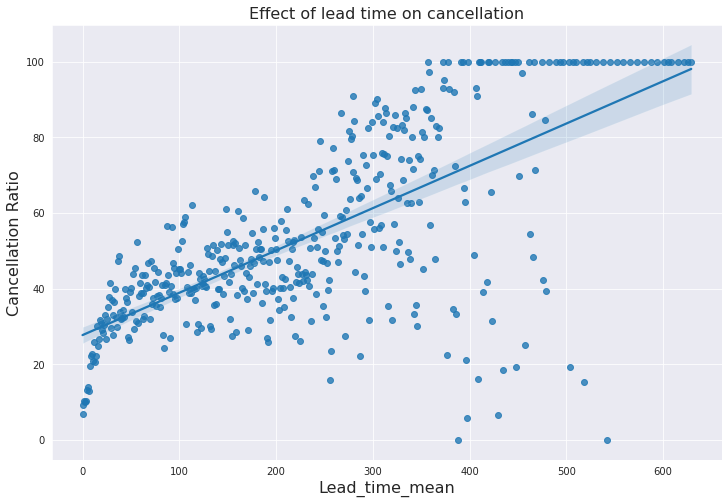

In [25]:
#Lead time and Cancellations
lead_cancel_data = hotelbooking_df.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancellation", fontsize=16)
plt.xlabel("Lead_time_mean", fontsize=16)
plt.ylabel("Cancellation Ratio", fontsize=16)
plt.show()

In [26]:
#Box plot of numerical features vs cancellation status

plot_list = ['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
'previous_bookings_not_canceled',
         'required_car_parking_spaces',
 'total_of_special_requests']

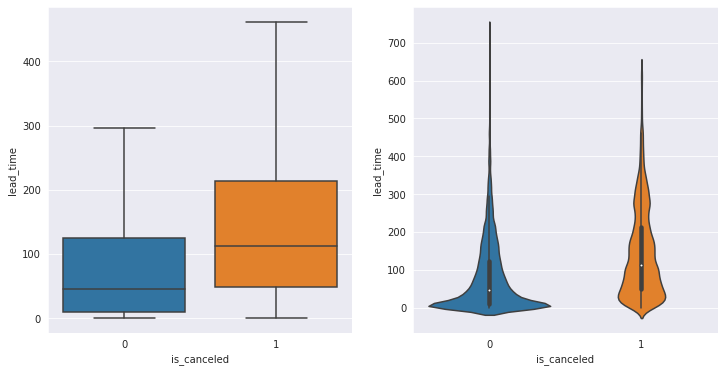

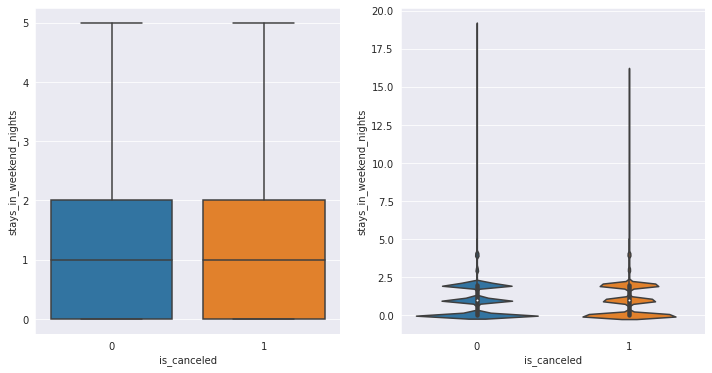

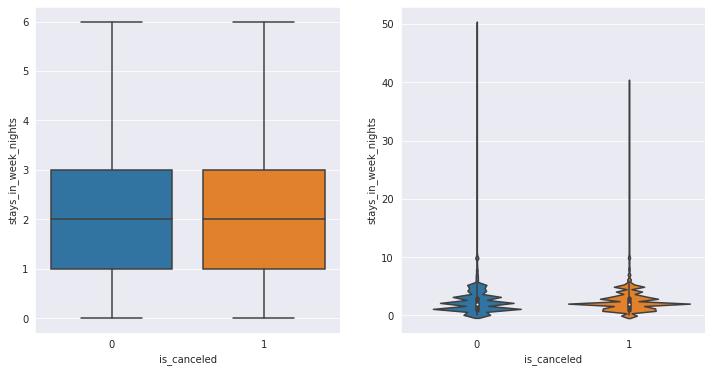

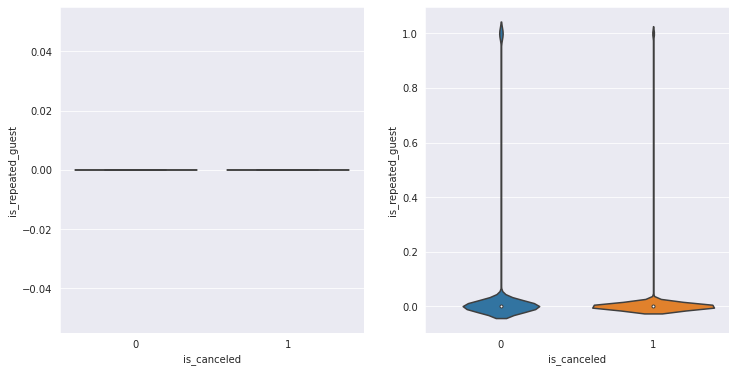

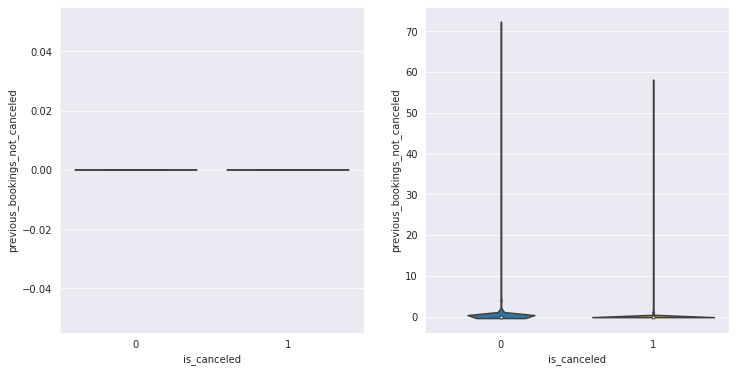

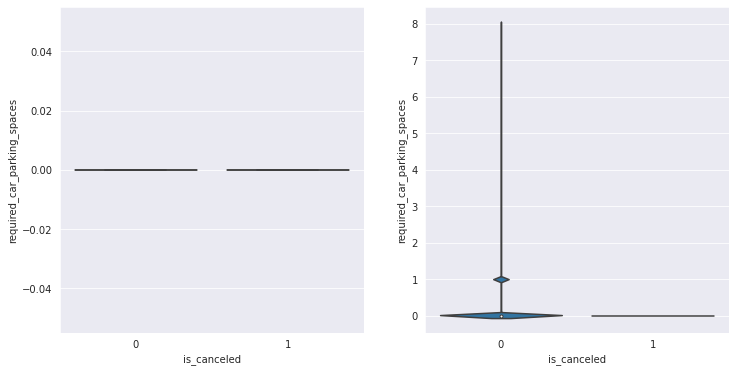

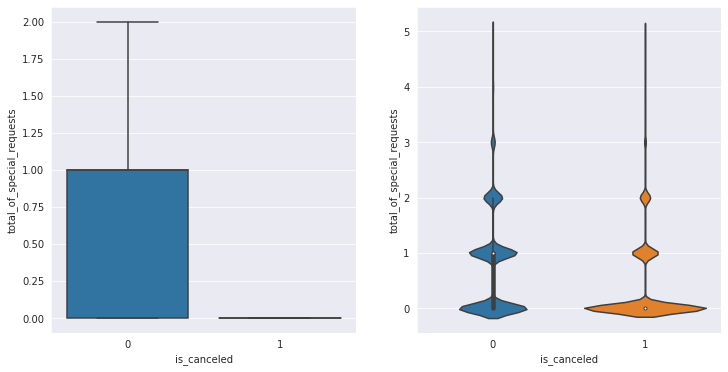

In [27]:
for i in plot_list:
    _, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,6))
    sns.boxplot(x = 'is_canceled', y = i, data = hotelbooking_df, showfliers = False, ax = ax[0])
    sns.violinplot(x = 'is_canceled', y = i, data = hotelbooking_df, showfliers = False, ax = ax[1])
    plt.show()

Another step in the analysis involves examining categorical features. The categorical labels are typically converted into numerical form to make them easier to understand and implement in machine learning algorithms. 

In [28]:
#Converting categorical variables into vectors using Encoder

lbl=LabelEncoder()
cols = ['hotel','market_segment', 'meal', 'country','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date']
hotelbooking_df_new[cols] = hotelbooking_df_new[cols].apply(lbl.fit_transform)
hotelbooking_df_new.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,0,87.0,189.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,July,27,1,0,0,2,...,0,87.0,189.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,July,27,1,0,1,1,...,0,87.0,189.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,July,27,1,0,1,1,...,0,304.0,189.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,July,27,1,0,2,2,...,0,240.0,189.0,0,2,98.0,0,1,1,123
5,1,0,14,2015,July,27,1,0,2,2,...,0,240.0,189.0,0,2,98.0,0,1,1,123
6,1,0,0,2015,July,27,1,0,2,2,...,0,87.0,189.0,0,2,107.0,0,0,1,123
7,1,0,9,2015,July,27,1,0,2,2,...,0,303.0,189.0,0,2,103.0,0,1,1,123
8,1,1,85,2015,July,27,1,0,3,2,...,0,240.0,189.0,0,2,82.0,0,1,0,72
9,1,1,75,2015,July,27,1,0,3,2,...,0,15.0,189.0,0,2,105.5,0,0,0,61


[Text(0.5, 0, 'hotel'),
 Text(1.5, 0, 'is_canceled'),
 Text(2.5, 0, 'lead_time'),
 Text(3.5, 0, 'arrival_date_year'),
 Text(4.5, 0, 'arrival_date_week_number'),
 Text(5.5, 0, 'arrival_date_day_of_month'),
 Text(6.5, 0, 'stays_in_weekend_nights'),
 Text(7.5, 0, 'stays_in_week_nights'),
 Text(8.5, 0, 'adults'),
 Text(9.5, 0, 'children'),
 Text(10.5, 0, 'babies'),
 Text(11.5, 0, 'meal'),
 Text(12.5, 0, 'country'),
 Text(13.5, 0, 'market_segment'),
 Text(14.5, 0, 'distribution_channel'),
 Text(15.5, 0, 'is_repeated_guest'),
 Text(16.5, 0, 'previous_cancellations'),
 Text(17.5, 0, 'previous_bookings_not_canceled'),
 Text(18.5, 0, 'reserved_room_type'),
 Text(19.5, 0, 'assigned_room_type'),
 Text(20.5, 0, 'booking_changes'),
 Text(21.5, 0, 'deposit_type'),
 Text(22.5, 0, 'agent'),
 Text(23.5, 0, 'company'),
 Text(24.5, 0, 'days_in_waiting_list'),
 Text(25.5, 0, 'customer_type'),
 Text(26.5, 0, 'adr'),
 Text(27.5, 0, 'required_car_parking_spaces'),
 Text(28.5, 0, 'total_of_special_requests'),

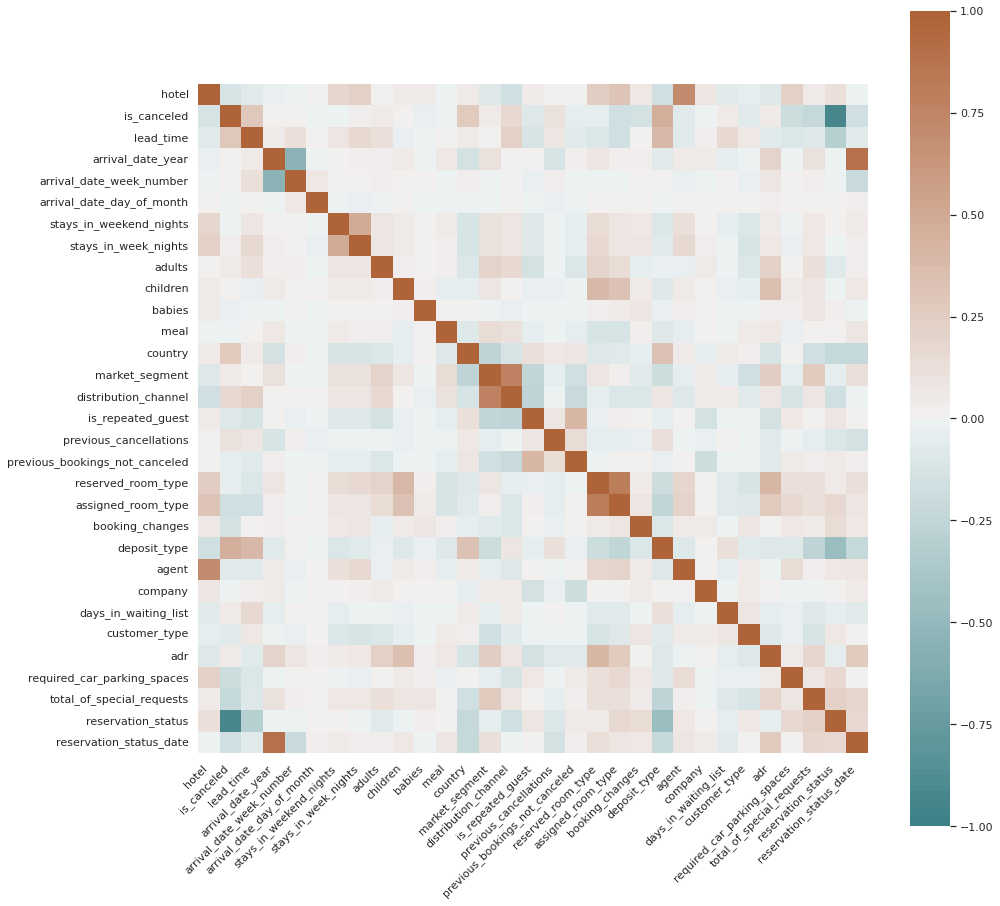

In [29]:
#Identifying correlation between the columns
creln=hotelbooking_df_new.corr()
sns.set(rc = {'figure.figsize':(15,15)})
ax=sns.heatmap(creln,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(200,30,n=100),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [30]:
#Variable importance selection

#Removing columns which are not needed
hotelbooking_df_new.drop(['arrival_date_month', 'meal','customer_type', 'reservation_status', 'reservation_status_date'], axis = 1, inplace=True)


In [31]:
#Retaining only the columns needed to build the model
y = np.array(hotelbooking_df_new['is_canceled'])
X = np.array(hotelbooking_df_new[["hotel","lead_time","country","distribution_channel","previous_cancellations","assigned_room_type","booking_changes","required_car_parking_spaces","total_of_special_requests","deposit_type"]])

Splitting the data into train and testing dataset in the ratio of 80% and 20% respectively

In [32]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(95511, 10) (23878, 10) (95511,) (23878,)


In [34]:
#Standardizing the data using StandardScalar technique

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Building Models



Logistic Regression

In [35]:
#Implementing Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
accuracy= accuracy_score(pred_logreg,y_test)
print ('Accuracy : {:.2f}%'.format(accuracy*100))
MSE_logreg=mean_squared_error(y_test,pred_logreg)
RMSE_logreg=math.sqrt(MSE_logreg)
print("The RMSE value for Logistic Regression Classifier is:",round(RMSE_logreg,3))
#print("The Coefficients are:", logreg.coef_)

Accuracy : 77.43%
The RMSE value for Logistic Regression Classifier is: 0.475


              precision    recall  f1-score   support

           0       0.75      0.96      0.84     15149
           1       0.86      0.46      0.60      8729

    accuracy                           0.77     23878
   macro avg       0.81      0.71      0.72     23878
weighted avg       0.79      0.77      0.75     23878

[[14482   667]
 [ 4723  4006]]


<AxesSubplot:>

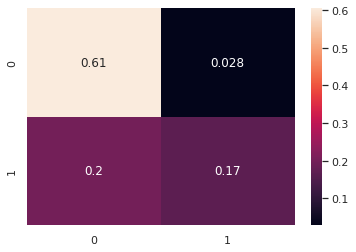

In [36]:
#Confusion Matrix for Logistic Regression
print(classification_report(y_test,pred_logreg))
cf_matrix_logreg = confusion_matrix(y_test, pred_logreg)
print(cf_matrix_logreg)
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(cf_matrix_logreg/np.sum(cf_matrix_logreg), annot=True)

Random Forest Classifier

In [37]:


random_fc = RandomForestClassifier()
random_fc.fit(X_train,y_train)
pred_random_fc = random_fc.predict(X_test)
acc_random_fc = accuracy_score(pred_random_fc, y_test)
print ('Accuracy : {:.2f}%'.format(acc_random_fc*100))
MSE_random_fc=mean_squared_error(y_test,pred_random_fc)
RMSE_random_fc=math.sqrt(MSE_random_fc)
print("The RMSE value for Random Forest Classifier is:",round(RMSE_random_fc,3))

Accuracy : 82.27%
The RMSE value for Random Forest Classifier is: 0.421


              precision    recall  f1-score   support

           0       0.84      0.89      0.86     15149
           1       0.78      0.71      0.75      8729

    accuracy                           0.82     23878
   macro avg       0.81      0.80      0.80     23878
weighted avg       0.82      0.82      0.82     23878

[[13431  1718]
 [ 2515  6214]]


<AxesSubplot:>

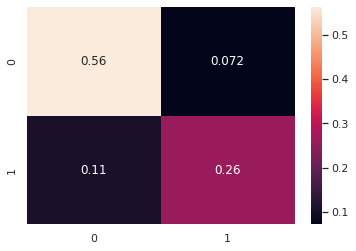

In [38]:
#Confusion matrix for Random Forest Classifier
print(classification_report(y_test,pred_random_fc))
cf_matrix_random_fc = confusion_matrix(y_test, pred_random_fc)
print(cf_matrix_random_fc)
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(cf_matrix_random_fc/np.sum(cf_matrix_random_fc), annot=True)

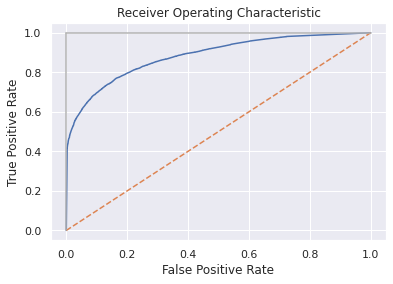

In [39]:
#Plotting ROC_CURVE for best result
from sklearn.metrics import roc_curve
target_probabilities=random_fc.predict_proba(X_test)[:,1]
false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,target_probabilities)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.7'),plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree Classifier

F1 score: 0.488
Test accuracy: 0.751
Average cross validation score: 0.749
The RMSE value for Decision Tree Classifier is: 0.499
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     15149
           1       0.99      0.32      0.49      8729

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878

[[15108    41]
 [ 5898  2831]]


<AxesSubplot:>

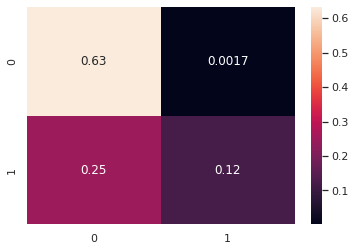

In [40]:
#Implementing the Decision Tres
deci_tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)

scores = cross_val_score(deci_tree, X_train, y_train, cv=5)
deci_tree_pred = deci_tree.predict(X_test)
MSE_deci_tree=mean_squared_error(y_test,deci_tree_pred)
RMSE_deci_tree=math.sqrt(MSE_deci_tree)
print("F1 score: {:.3f}".format(f1_score(y_test, deci_tree_pred)))
print("Test accuracy: {:.3f}".format(deci_tree.score(X_test, y_test)))
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("The RMSE value for Decision Tree Classifier is:",round(RMSE_deci_tree,3))
print(classification_report(y_test,deci_tree_pred))
#Confusion matrix for Decision Tres
cf_matrix_deci_tree = confusion_matrix(y_test, deci_tree_pred)
print(cf_matrix_deci_tree)
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(cf_matrix_deci_tree/np.sum(cf_matrix_deci_tree), annot=True)

K- Nearest Neighbour Classification

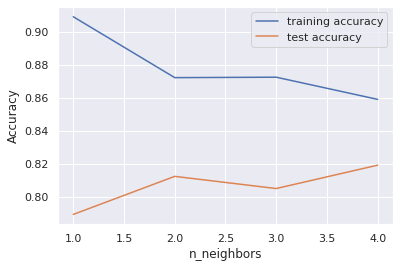

In [41]:
#Implementing KNN

accuracy_training = []
accuracy_test = []
neighbors = range(1, 5)
for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    accuracy_training.append(knn.score(X_train, y_train))
    accuracy_test.append(knn.score(X_test, y_test))
plt.plot(neighbors, accuracy_training, label="training accuracy")
plt.plot(neighbors, accuracy_test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

F1 score: 0.723
Test accuracy: 0.805
Average cross validation score: 0.802
The RMSE value for KNN is: 0.442
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     15149
           1       0.75      0.70      0.72      8729

    accuracy                           0.81     23878
   macro avg       0.79      0.78      0.79     23878
weighted avg       0.80      0.81      0.80     23878

[[13135  2014]
 [ 2642  6087]]


<AxesSubplot:>

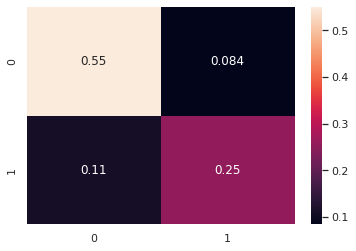

In [42]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
MSE_knn=mean_squared_error(y_test,knn_pred)
RMSE_knn=math.sqrt(MSE_knn)
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("The RMSE value for KNN is:",round(RMSE_knn,3))
print(classification_report(y_test,knn_pred))
#Confusion matrix for KNN
cf_matrix=confusion_matrix(y_test, knn_pred)
print(cf_matrix)
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True)


Displaying Accuracies of all models

In [43]:

output = pd.DataFrame({"Model":['Logistic Reg','Random Forest','Decision Tree','KNN'],
                      "Accuracy":[accuracy, acc_random_fc,deci_tree.score(X_test, y_test),knn.score(X_test, y_test)]})
output

,Model,Accuracy
0,Logistic Reg,0.774269
1,Random Forest,0.822724
2,Decision Tree,0.751277
3,KNN,0.805009


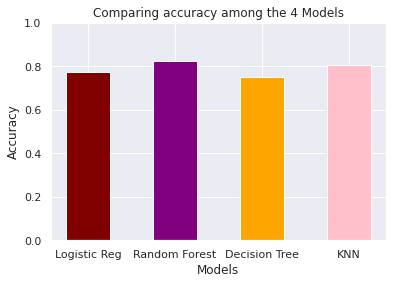

In [44]:
#Plot the barplot
plt.bar(output['Model'],output['Accuracy'],color=['maroon','purple','orange','pink'],width=0.5)
plt.ylim(0,1.0)
plt.ylabel('Accuracy')
plt.xlabel("Models")
plt.title('Comparing accuracy among the 4 Models')
plt.show()

Based on the obtained scores from each of the models, it was found that the random forest model had the highest prediction accuracy compared to the other models. A bar graph was used to visually represent the scores of each model.

In [45]:
# Most ideal hyperparamters

ideal_model = RandomForestClassifier()

# Fit the ideal model

ideal_model.fit(X_train, y_train)
ideal_model.score(X_test, y_test)

0.8220537733478516

In [46]:
# Find feature importance of our best model

ideal_model.feature_importances_

array([0.01670243, 0.42149983, 0.17349109, 0.02702352, 0.03564267,
       0.05228954, 0.0309169 , 0.02555002, 0.0517017 , 0.16518229])

A visualization is created to assist countries in identifying which sectors to prioritize. The graph displays the most significant or impactful feature as determined by the model.

<AxesSubplot:>

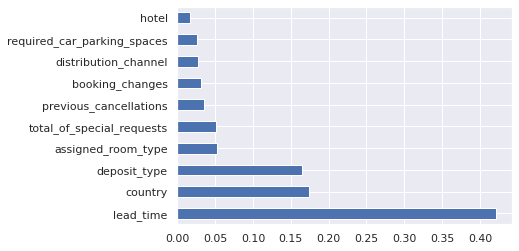

In [49]:
# Function for plotting feature importance
import pandas as pd

hotelbooking_varimp=pd.read_csv("hotel_bookings.csv")

x_new1 = (hotelbooking_varimp[["hotel","lead_time","country","distribution_channel","previous_cancellations","assigned_room_type","booking_changes","required_car_parking_spaces","total_of_special_requests","deposit_type"]])

feat_importances = pd.Series(ideal_model.feature_importances_, index=x_new1.columns)
feat_importances.nlargest(10).plot(kind='barh')


# INSIGHTS & RECOMMENDATIONS

- Lead time, deposit type, country are the top three features with highest impact on the model.
- Loyalty programs could be offered to customers having greater lead time so that it can help in the avoiding the cancellations.
- The payment type ‘No Deposit’ tends to experience a greater number of cancellations compared to other payment types. The hotel management should keep a nominal amount as minimum deposit in order to get rid of the category of ‘No Deposit’ thus reducing the cancellations. 